In [1]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import requests
import json
from pathlib import Path

In [2]:
adp_data_to_load = Path("Resources/adp_merged_7_17.csv")
fantasy_data_to_load = Path("Resources/fantasy_merged_7_17.csv")

In [3]:
adp_data = pd.read_csv(adp_data_to_load)
fantasy_data = pd.read_csv(fantasy_data_to_load)
fantasy_football_data_complete = pd.merge(adp_data, fantasy_data, how="left", on=["PlayerID"])
adp_data_clean = adp_data.fillna(0)
fantasy_data_clean = fantasy_data.fillna(0)
fantasy_football_data_complete_clean = fantasy_football_data_complete.fillna(0)

In [4]:
fantasy_data

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,NaN,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,573,Nate Sudfeld,DET,QB,29,2,0,0,0,0,...,0,0,NaN,0,0,0,-0.4,SudfNa00,80.0,2022
3384,574,KaVontae Turpin,DAL,WR,26,17,0,0,0,0,...,1,9,9.00,0,3,2,-0.4,TurpKa00,218.0,2022
3385,575,Chad Henne,KAN,QB,37,3,0,0,2,0,...,0,0,NaN,0,1,0,-0.5,HennCh01,81.0,2022
3386,576,C.J. Beathard,JAX,QB,29,4,0,7,11,35,...,0,0,NaN,0,0,0,-1.0,BeatC.00,82.0,2022


In [5]:
fantasy_football_data_complete = pd.merge(adp_data, fantasy_data, how="left", on=["PlayerID","Year"])

In [6]:
fantasy_football_data_complete_clean_2 = fantasy_football_data_complete.fillna(0)

## 6) Average points scored seasonally by position. 

Text(0.5, 1.0, 'Fantasy Points Earned in 2017 Season vs Average Draft Pick')

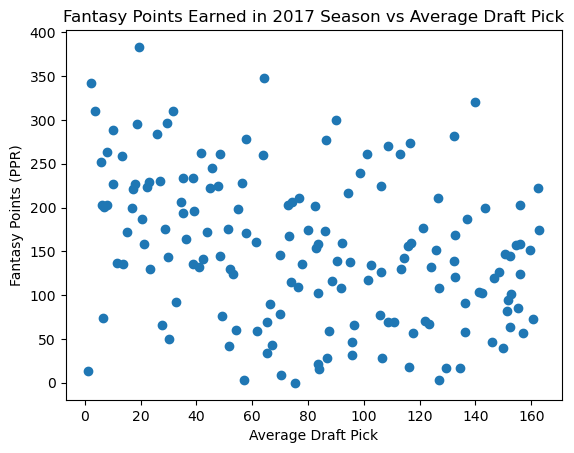

In [8]:
adp_2017 = fantasy_football_data_complete[fantasy_football_data_complete["Year"] == 2017]
plt.scatter(adp_2017["adp"],adp_2017["PPR"])
plt.xlabel("Average Draft Pick")
plt.ylabel("Fantasy Points (PPR)")
plt.title("Fantasy Points Earned in 2017 Season vs Average Draft Pick")

In [9]:
adp_2017_clean = adp_2017.fillna(0)

In [10]:
adp_2017_clean

,Year,name,position,team,adp,PlayerID,Rk,Player,Tm,FantPos,...,RushTD,Tgt,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PosRk
0,2017,David Johnson,RB,ARI,1.3,JohnDa08,407.0,David Johnson,ARI,RB,...,0.0,9.0,6.0,67.0,11.17,0.0,2.0,1.0,13.0,115.0
1,2017,Le'Veon Bell,RB,PIT,2.3,BellLe00,3.0,Le'Veon Bell,PIT,RB,...,9.0,106.0,85.0,655.0,7.71,2.0,3.0,2.0,341.6,2.0
2,2017,Antonio Brown,WR,PIT,3.7,BrowAn04,5.0,Antonio Brown,PIT,WR,...,0.0,163.0,101.0,1533.0,15.18,9.0,4.0,0.0,310.3,1.0
3,2017,Julio Jones,WR,ATL,5.7,JoneJu02,26.0,Julio Jones,ATL,WR,...,0.0,148.0,88.0,1444.0,16.41,3.0,0.0,0.0,251.9,7.0
4,2017,Ezekiel Elliott,RB,DAL,6.2,ElliEz00,51.0,Ezekiel Elliott,DAL,RB,...,7.0,38.0,26.0,269.0,10.35,2.0,1.0,1.0,203.2,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2017,Donta Foreman,RB,HOU,157.0,ForeDO00,253.0,D'Onta Foreman,HOU,RB,...,2.0,8.0,6.0,83.0,13.83,0.0,2.0,1.0,57.0,74.0
159,2017,Giovani Bernard,RB,CIN,159.6,BernGi00,99.0,Giovani Bernard,CIN,RB,...,2.0,60.0,43.0,389.0,9.05,2.0,0.0,0.0,151.7,27.0
160,2017,Charcandrick West,RB,KC,160.7,WestCh01,216.0,Charcandrick West,KAN,RB,...,2.0,34.0,27.0,150.0,5.56,2.0,1.0,0.0,73.2,65.0
161,2017,Tyrod Taylor,QB,BUF,162.4,TaylTy00,41.0,Tyrod Taylor,BUF,QB,...,4.0,0.0,0.0,0.0,0.00,0.0,4.0,2.0,222.7,16.0


In [11]:
corre = st.pearsonr(adp_2017_clean["adp"],adp_2017_clean["PPR"])
print(f"The correlation between average draft pick and fantasy points earned in 2017 is {round(corre[0],2)}")

The correlation between average draft pick and fantasy points earned in 2017 is -0.35


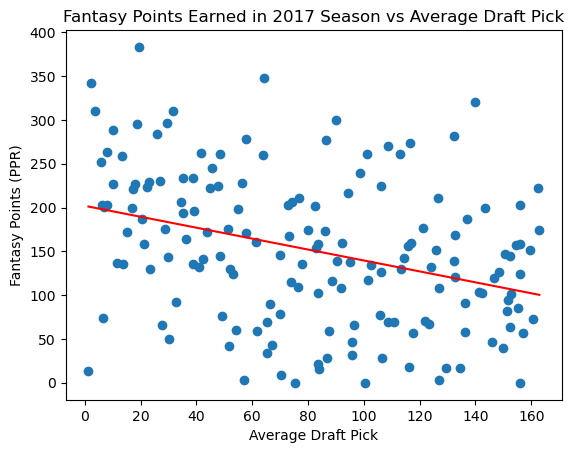

In [12]:
model = st.linregress(adp_2017_clean["adp"],adp_2017_clean["PPR"])
slope = model[0]
y_intercept = model[1]
y_values_2017 = adp_2017_clean["adp"] * slope + y_intercept
plt.scatter(adp_2017_clean["adp"],adp_2017_clean["PPR"])
plt.xlabel("Average Draft Pick")
plt.ylabel("Fantasy Points (PPR)")
plt.title("Fantasy Points Earned in 2017 Season vs Average Draft Pick")
plt.plot(adp_2017_clean["adp"],y_values_2017,color="red")

The correlation between average draft pick and fantasy points earned in 2018 is -0.33


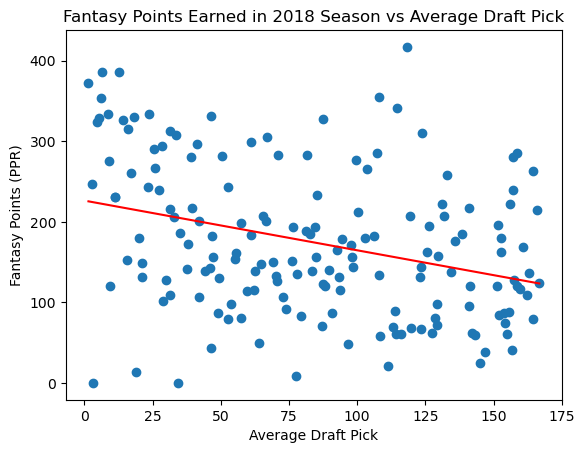

In [13]:
adp_2018 = fantasy_football_data_complete[fantasy_football_data_complete["Year"] == 2018]
adp_2018_clean = adp_2018.fillna(0)
corre = st.pearsonr(adp_2018_clean["adp"],adp_2018_clean["PPR"])
print(f"The correlation between average draft pick and fantasy points earned in 2018 is {round(corre[0],2)}")
model = st.linregress(adp_2018_clean["adp"],adp_2018_clean["PPR"])
slope = model[0]
y_intercept = model[1]
y_values_2018 = adp_2018_clean["adp"] * slope + y_intercept
plt.scatter(adp_2018_clean["adp"],adp_2018_clean["PPR"])
plt.xlabel("Average Draft Pick")
plt.ylabel("Fantasy Points (PPR)")
plt.title("Fantasy Points Earned in 2018 Season vs Average Draft Pick")
plt.plot(adp_2018_clean["adp"],y_values_2018,color="red")

The correlation between average draft pick and fantasy points earned in 2019 is -0.43


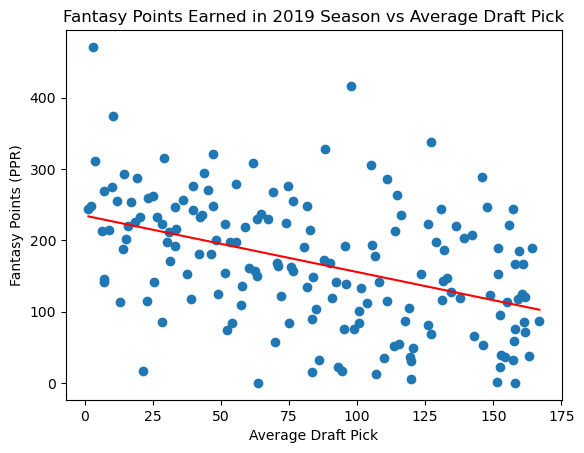

In [14]:
adp_2019 = fantasy_football_data_complete[fantasy_football_data_complete["Year"] == 2019]
adp_2019_clean = adp_2019.fillna(0)
corre = st.pearsonr(adp_2019_clean["adp"],adp_2019_clean["PPR"])
print(f"The correlation between average draft pick and fantasy points earned in 2019 is {round(corre[0],2)}")
model = st.linregress(adp_2019_clean["adp"],adp_2019_clean["PPR"])
slope = model[0]
y_intercept = model[1]
y_values_2019 = adp_2019_clean["adp"] * slope + y_intercept
plt.scatter(adp_2019_clean["adp"],adp_2019_clean["PPR"])
plt.xlabel("Average Draft Pick")
plt.ylabel("Fantasy Points (PPR)")
plt.title("Fantasy Points Earned in 2019 Season vs Average Draft Pick")
plt.plot(adp_2019_clean["adp"],y_values_2019,color="red")


The correlation between average draft pick and fantasy points earned in 2020 is -0.38


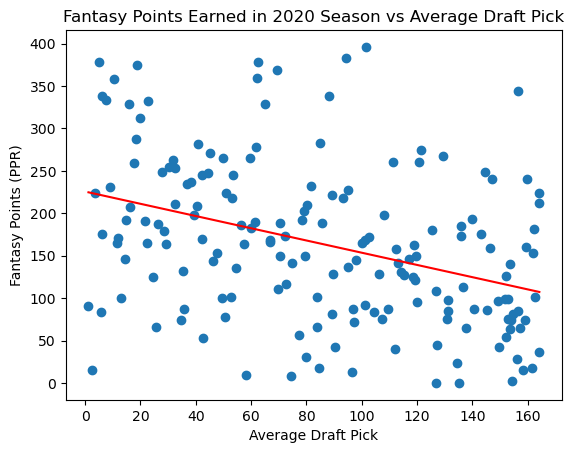

In [15]:
adp_2020 = fantasy_football_data_complete[fantasy_football_data_complete["Year"] == 2020]
adp_2020_clean = adp_2020.fillna(0)
corre = st.pearsonr(adp_2020_clean["adp"],adp_2020_clean["PPR"])
print(f"The correlation between average draft pick and fantasy points earned in 2020 is {round(corre[0],2)}")
model = st.linregress(adp_2020_clean["adp"],adp_2020_clean["PPR"])
slope = model[0]
y_intercept = model[1]
y_values_2020 = adp_2020_clean["adp"] * slope + y_intercept
plt.scatter(adp_2020_clean["adp"],adp_2020_clean["PPR"])
plt.xlabel("Average Draft Pick")
plt.ylabel("Fantasy Points (PPR)")
plt.title("Fantasy Points Earned in 2020 Season vs Average Draft Pick")
plt.plot(adp_2020_clean["adp"],y_values_2020,color="red")


The correlation between average draft pick and fantasy points earned in 2021 is -0.44


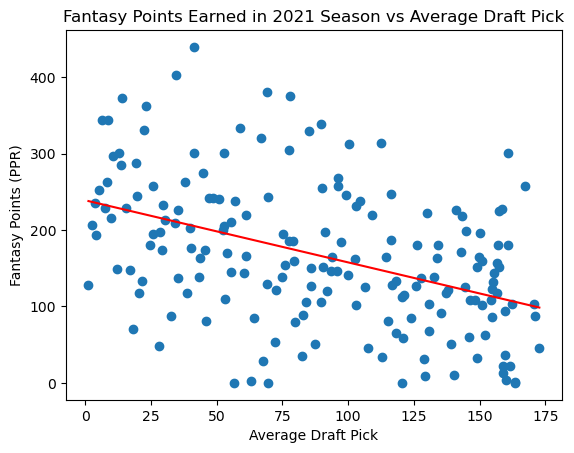

In [16]:
adp_2021 = fantasy_football_data_complete[fantasy_football_data_complete["Year"] == 2021]
adp_2021_clean = adp_2021.fillna(0)
corre = st.pearsonr(adp_2021_clean["adp"],adp_2021_clean["PPR"])
print(f"The correlation between average draft pick and fantasy points earned in 2021 is {round(corre[0],2)}")
model = st.linregress(adp_2021_clean["adp"],adp_2021_clean["PPR"])
slope = model[0]
y_intercept = model[1]
y_values_2021 = adp_2021_clean["adp"] * slope + y_intercept
plt.scatter(adp_2021_clean["adp"],adp_2021_clean["PPR"])
plt.xlabel("Average Draft Pick")
plt.ylabel("Fantasy Points (PPR)")
plt.title("Fantasy Points Earned in 2021 Season vs Average Draft Pick")
plt.plot(adp_2021_clean["adp"],y_values_2021,color="red")


The correlation between average draft pick and fantasy points earned in 2022 is -0.48


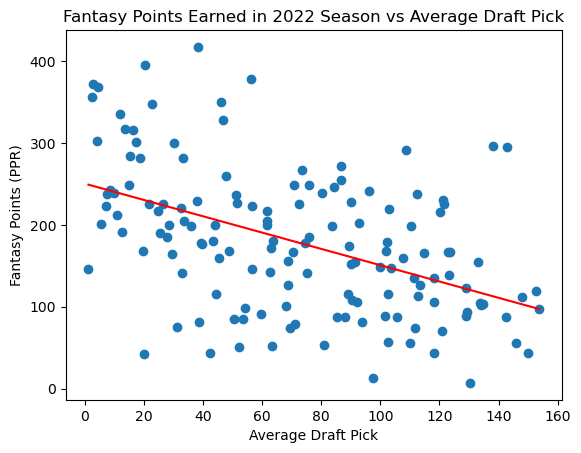

In [17]:
adp_2022 = fantasy_football_data_complete[fantasy_football_data_complete["Year"] == 2022]
adp_2022_clean = adp_2022.fillna(0)
corre = st.pearsonr(adp_2022_clean["adp"],adp_2022_clean["PPR"])
print(f"The correlation between average draft pick and fantasy points earned in 2022 is {round(corre[0],2)}")
model = st.linregress(adp_2022_clean["adp"],adp_2022_clean["PPR"])
slope = model[0]
y_intercept = model[1]
y_values_2022 = adp_2022_clean["adp"] * slope + y_intercept
plt.scatter(adp_2022_clean["adp"],adp_2022_clean["PPR"])
plt.xlabel("Average Draft Pick")
plt.ylabel("Fantasy Points (PPR)")
plt.title("Fantasy Points Earned in 2022 Season vs Average Draft Pick")
plt.plot(adp_2022_clean["adp"],y_values_2022,color="red")


In [18]:
alpha_1 = 0.4
line_width = 3
red = "#ff2500"
red_comp = "#00daff"

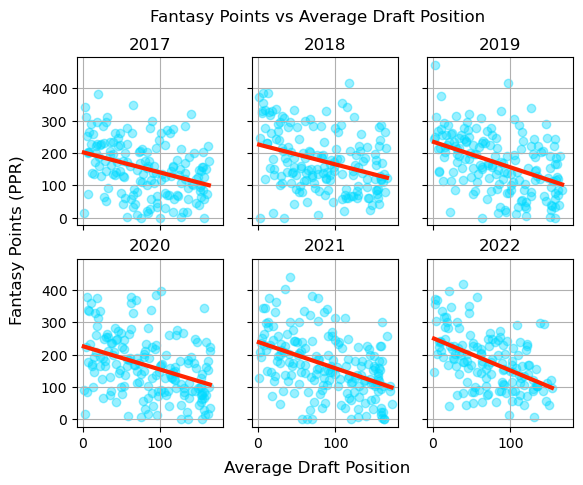

In [19]:
#Credits to Angel A.R. for polishing the Visuals of the Chart

figure_1, axes_1 = plt.subplots(2,3,sharey=True,sharex=True)
axes_1[0,0].scatter(adp_2017_clean["adp"],adp_2017_clean["PPR"],alpha=alpha_1,color=red_comp)
axes_1[0,0].plot(adp_2017_clean["adp"], y_values_2017 , color=red, linewidth=line_width)
axes_1[0,1].scatter(adp_2018_clean["adp"], adp_2018_clean["PPR"],alpha=alpha_1,color=red_comp)
axes_1[0,1].plot(adp_2018_clean["adp"], y_values_2018 , color=red, linewidth=line_width)
axes_1[0,2].scatter(adp_2019_clean["adp"], adp_2019_clean["PPR"],alpha=alpha_1,color=red_comp)
axes_1[0,2].plot(adp_2019_clean["adp"], y_values_2019 , color=red, linewidth=line_width)
axes_1[1,0].scatter(adp_2020_clean["adp"], adp_2020_clean["PPR"],alpha=alpha_1,color=red_comp)
axes_1[1,0].plot(adp_2020_clean["adp"], y_values_2020 , color=red, linewidth=line_width)
axes_1[1,1].scatter(adp_2021_clean["adp"], adp_2021_clean["PPR"],alpha=alpha_1,color=red_comp)
axes_1[1,1].plot(adp_2021_clean["adp"], y_values_2021 , color=red, linewidth=line_width)
axes_1[1,2].scatter(adp_2022_clean["adp"], adp_2022_clean["PPR"],alpha=alpha_1,color=red_comp)
axes_1[1,2].plot(adp_2022_clean["adp"], y_values_2022 , color=red, linewidth=line_width)

axes_1[0,0].grid()
axes_1[0,1].grid()
axes_1[0,2].grid()
axes_1[1,0].grid()
axes_1[1,1].grid()
axes_1[1,2].grid()

axes_1[0,0].set_title("2017")
axes_1[0,1].set_title("2018")
axes_1[0,2].set_title("2019")
axes_1[1,0].set_title("2020")
axes_1[1,1].set_title("2021")
axes_1[1,2].set_title("2022")

figure_1.supxlabel("Average Draft Position")
figure_1.supylabel("Fantasy Points (PPR)")
figure_1.suptitle("Fantasy Points vs Average Draft Position")

plt.savefig("./Resources/PPR_vs_ADP.png")